In [1]:
import sys, os, re
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import (
    open_from_dir,
    plot_runs,
    plot_runs_1D,
    plot_grid,
    select_best_runs,
)

In [2]:
# open all files from ./eval
fidelities_mat, params_grouped, params_each = open_from_dir("./eval")
fidelities_best_mat, params_grouped_best, params_each_best = select_best_runs(fidelities_mat, params_each)

Opening files...


100%|██████████| 27/27 [00:00<00:00, 935.56it/s]

Done.


Text(0.5, 1.0, 'Fidelity over Time for all runs')

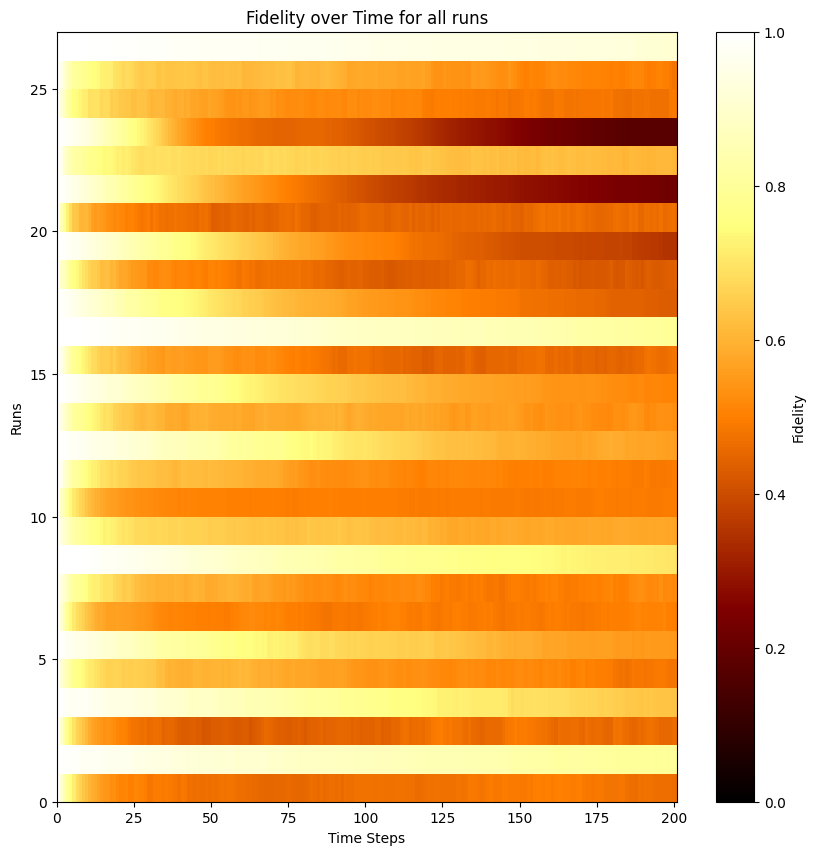

In [3]:
fig, ax = plot_runs(
    fidelities_mat,
    params_grouped,
    sort_by="s",
    show_labels=False,
    figsize=(10,10),
)
ax.set_title("Fidelity over Time for all runs")

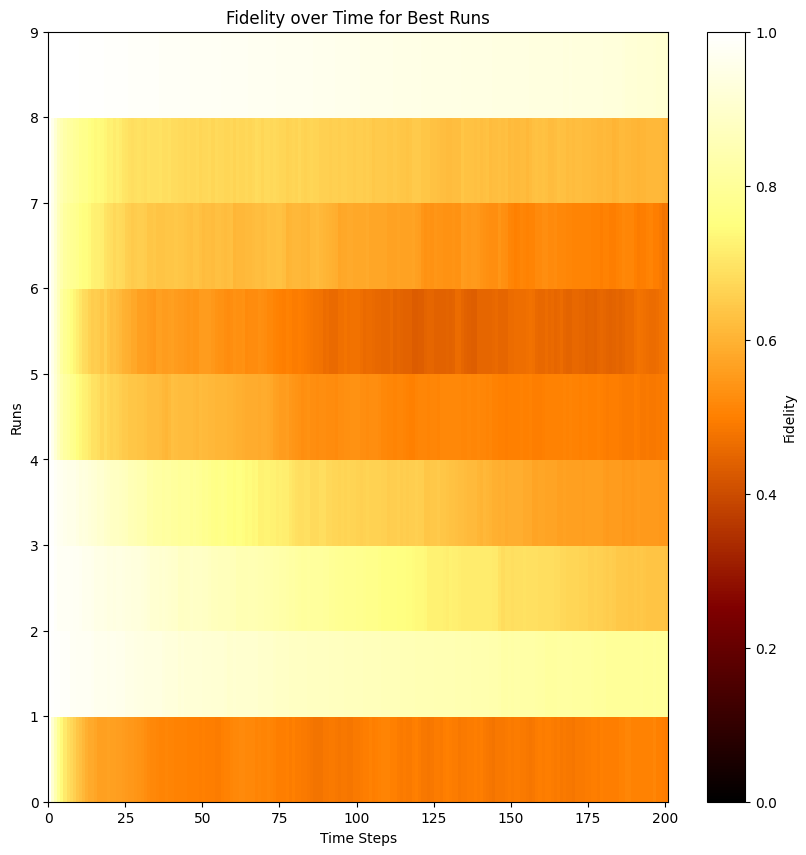

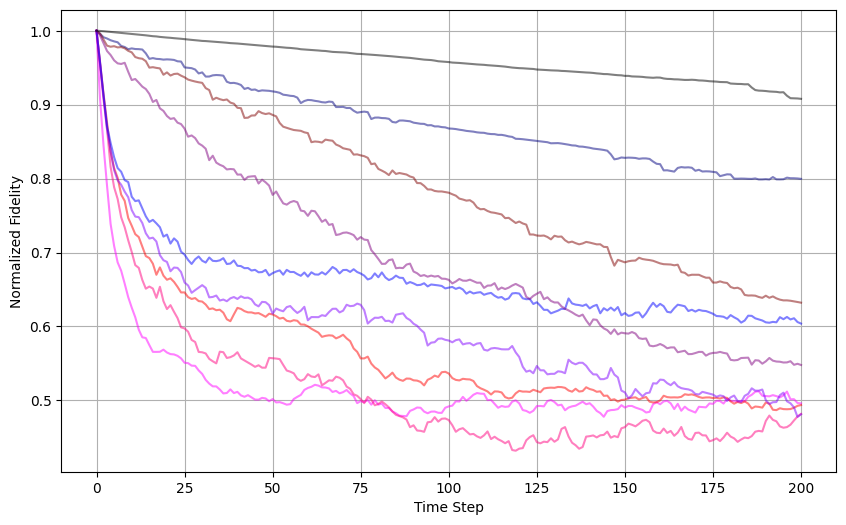

In [4]:
fig, ax = plot_runs(
    fidelities_best_mat,
    params_grouped_best,
    sort_by="s",
    show_labels=False,
    figsize=(10,10),
)
ax.set_title("Fidelity over Time for Best Runs")

fig, ax = plot_runs_1D(
    fidelities_best_mat,
    params_grouped_best,
    figsize=(10,6),
)

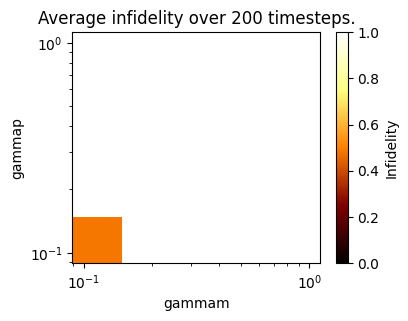

In [5]:
fig, ax, im = plot_grid(
    1 - fidelities_best_mat.mean(axis=1),
    params_grouped_best,
    x_param="gammam",
    y_param="gammap",
    figsize=(4,3)
)

ax.set_title(f"Average infidelity over {fidelities_mat.shape[1]-1} timesteps.")
ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(im, ax=ax, label="Infidelity")

Opening files...


100%|██████████| 9/9 [00:00<00:00, 977.72it/s]

Done.


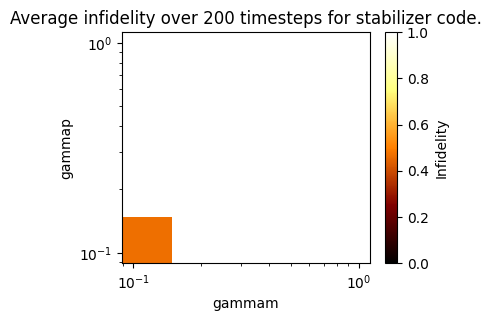

In [6]:
# Next, compare to stabilizer code results
fidelities_mat_stabilizer, params_grouped_stabilizer, params_each_stabilizer = open_from_dir("./custom/Stabilizer code")

fig, ax, im = plot_grid(
    1 - fidelities_mat_stabilizer.mean(axis=1),
    params_grouped_stabilizer,
    x_param="gammam",
    y_param="gammap",
    figsize=(4,3)
)

ax.set_title(f"Average infidelity over {fidelities_mat.shape[1]-1} timesteps for stabilizer code.")
ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(im, ax=ax, label="Infidelity")

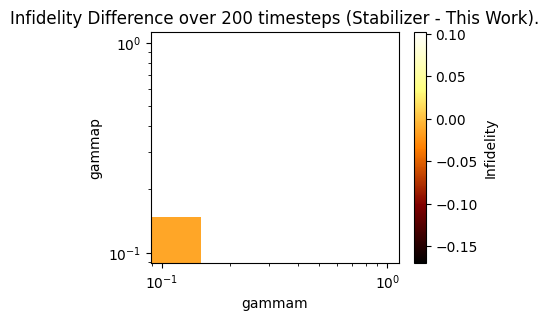

In [7]:
# Plot their difference
fig, ax, im = plot_grid(
    (1 - fidelities_mat_stabilizer.mean(axis=1)) - (1 - fidelities_best_mat.mean(axis=1)),
    params_grouped_stabilizer,
    x_param="gammam",
    y_param="gammap",
    figsize=(4,3),
    vmin=None,
    vmax=None,
)

ax.set_title(f"Infidelity Difference over {fidelities_mat.shape[1]-1} timesteps (Stabilizer - This Work).")
ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(im, ax=ax, label="Infidelity")